In [1]:
import pandas as pd

from sklearn.datasets import load_diabetes, load_boston

import seaborn as sns
sns.set_palette("Set1", 8, .75)
import matplotlib.pyplot as plt

from Utils import prepareData
from Visualization import display_side_by_side

## **Type of variables**

\begin{array}{lcccl}
\hline \text{Type of Variables}  & \text{conveys } \leq & \text{conveys } = & \text{Contains true zero} & \text{Example}\\\hline
       \text{Nominal or Categorical}               & No                   & No                & No  & \text{Psychological Diagnoses, Personality Types}\\
       \text{Ordinal or Ranked}               & Yes                  & No                & No  & \text{Finish places in a race}\\
       \text{Interval}              & Yes                  & Yes               & No  & \text{Celsius, Intelligence Test (IQ)}\\
       \text{Ratio}                 & Yes                  & Yes               & Yes & \text{Height, Weight}\\
\hline
\end{array}

* **Nominal Variables**: Measurement scale in which numbers serve only as labels and do not indicate any quantitative relationship.

* **Ordinal Variables**: Measurement scale in which numbers are ranks; equal differences between numbers do not represent equal differences between the things measured.

* **Interval Variables**: Measurement scale in which equal differences between numbers represent equal differences in the thing measured. The zero point is arbitrarily defined.

* **Ratio Variables**: Measurement scale with characteristics of interval scale, but it has a *true zero point*.

Difference between Interval and Ratio variables:

- Convert $100 ^\circ C$ and $50 ^\circ C$ to Fahrenheit (F = 1.8C + 32) and suddenly the "twice as much" relationship disappears.
- Convert 16 kilograms and 4 kilograms to pounds (1 kg = 2.2 lbs) and the "four times heavier" relationship is
maintained.

The difference is subtle. Therefore, those variables are referenced as ***continuos variables***.

## **Visualization**

In [2]:
#Ref: Statistical Abstract of the United States: 2013, 2012
df = pd.read_csv("data/women_man_height.csv")

In [3]:
df.head(3)

,height-men,height-women
0,72,68
1,69,66
2,77,60


Are men taller than women?

In [4]:
#Simple frequency distribution

get_freq_dist = lambda ser: ser.value_counts().reset_index(name="count").rename(columns = {"index":"height"})
men   = get_freq_dist(df["height-men"])
women = get_freq_dist(df["height-women"])

display_side_by_side([men, women], ["Man", "Women"], space=(50,30))

,height,count
0,69,8
1,72,7
2,70,7
3,71,6
4,73,4
5,68,4
6,65,3
7,75,2
8,67,2
9,66,2


### **Graphs of Frequency Distributions**

#### **Histogram**

* Used to present the frequencies of continuous variables.

* There is no "best" number of bins, and different bin sizes can reveal different features of the data.

* A common choice of bin size is given by this rules of thumb $ k=\lceil \sqrt n \text{ } \rceil$, where $n$ is the number of data points (Excel). There are many ways to calculate the number of bins https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width.



##### **Equally spaced bins**

In [5]:
aux = pd.wide_to_long(df.reset_index(), 
                      stubnames='height', 
                      i='index', 
                      j='sex', 
                      sep='-', 
                      suffix=r'\w+').reset_index(level=1)

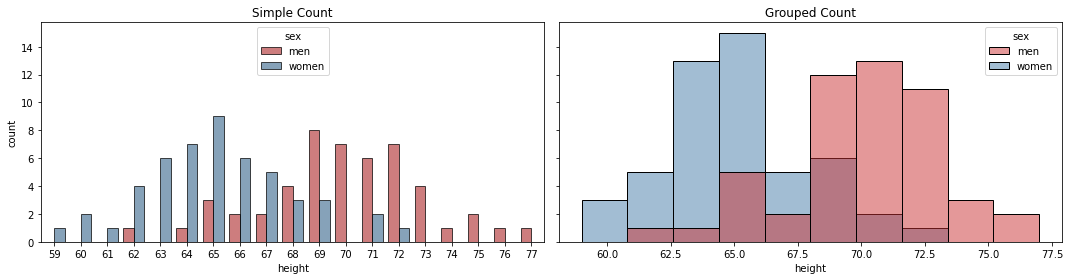

In [6]:
fig, axs = plt.subplots(1,2,sharey=True,figsize=(15,4))

qtd_bin = 10

heights = aux["height"].unique()
ax1  = sns.countplot(data=aux, x="height", hue="sex", 
                     edgecolor="black", alpha=0.7, ax = axs[0],)
ax2 = sns.histplot(data=aux, x="height", hue="sex", 
                   bins=qtd_bin, stat = "count", ax = axs[1],)

ax1.set_title("Simple Count")
ax2.set_title("Grouped Count")

plt.tight_layout()
plt.show()

In [7]:
calc_bins = aux["height"].agg(["max","min"])
bin_range = calc_bins.loc["max"] - calc_bins.loc["min"]
bin_step  = bin_range/qtd_bin
bins_position = [calc_bins.loc["min"] + bin_step*i for i in range(qtd_bin)]
bins_position

[59.0, 60.8, 62.6, 64.4, 66.2, 68.0, 69.8, 71.6, 73.4, 75.2]

##### **Variable bin widths**

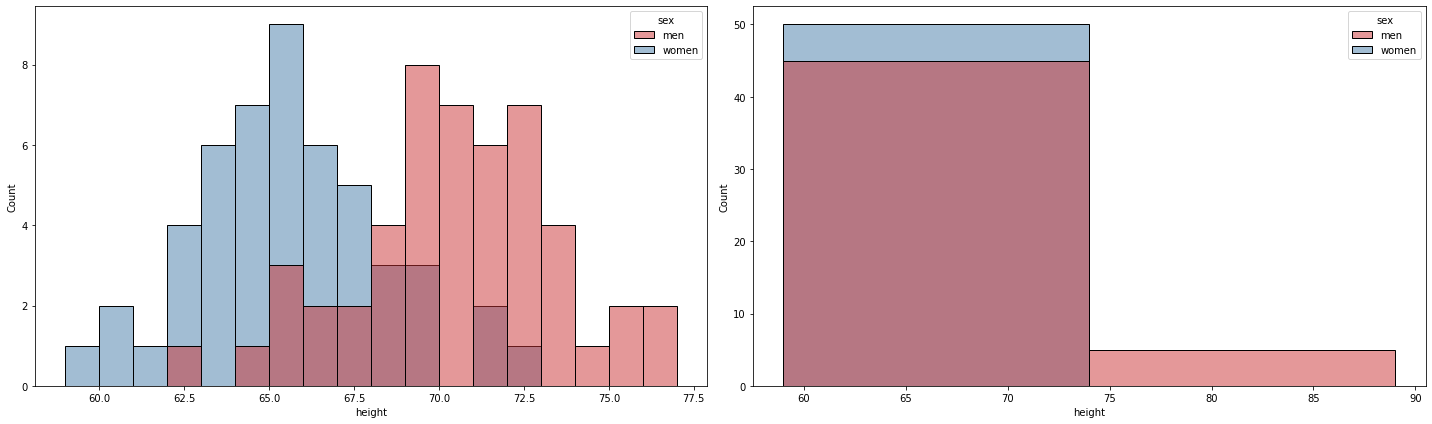

In [8]:
fig, axs = plt.subplots(1,2,figsize=(20,6))

diff_heights_size = len(aux["height"].unique())
ax1  = sns.histplot(data=aux, x="height", hue="sex", 
                    binwidth=1, stat = "count", ax = axs[0],)
ax2 = sns.histplot(data=aux, x="height", hue="sex", 
                   binwidth=15, stat = "count", ax = axs[1],)

plt.tight_layout()
plt.show()

#### **Cumulative Distribution**

#### **Bar Graph**

* Used to present the frequencies of categorical and discrete variables.